# 6-Pipeline

- **Goal:** Prediction Recognition

- **Purpose:** To implement full pipeline from generation synthetic data to model predictions and metrics.

- **Misc:**

In [1]:
import os
import sys

import pandas as pd


from pathlib import Path
from IPython.display import Image

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

from pipelines import BasePipeline
from data_processing import DataProcessing
from classification_models import PerceptronModel
from feature_extraction import TfidfFeatureExtraction, SpacyFeatureExtraction

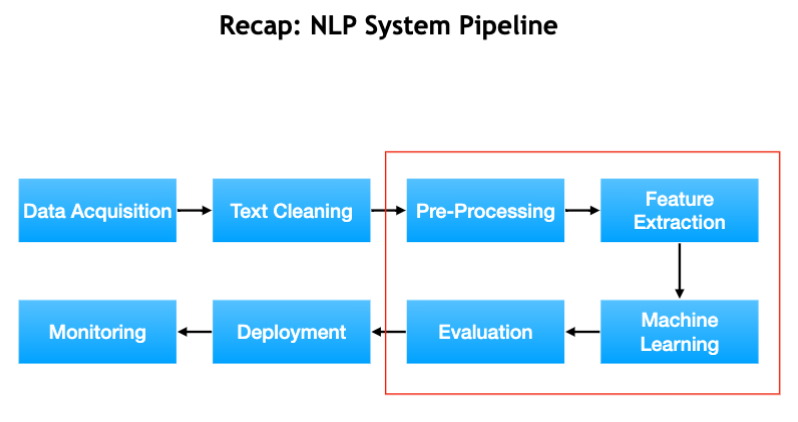

In [2]:
Image(filename='../misc/base_pipeline.png')

In [3]:
base_pipeline = BasePipeline()

## 1-Data Acquisition

- Only using the `%store -r` to shorten process for now. Will eventually place here or files

In [4]:
%store -r updated_predictions_df
%store -r updated_non_predictions_df

pd.set_option('max_colwidth', 800)

In [5]:
updated_predictions_df

,Base Sentence,Prediction Label,Model Name,Domain,Template Number
0,"On 2024-10-15, Rachel Brown, a financial analyst, predicts that the operating cash flow at General Motors will likely decrease by $5 billion in Q2 of 2026.",1,llama-3.3-70b-versatile,financial,1
1,"In 2024, Michael Davis from Goldman Sachs, forecasts that the stock price will rise from $50 to $75 per share in 2028.",1,llama-3.3-70b-versatile,financial,2
2,"Emily Chen, a financial expert, predicts on 08/20/2024 that the research and development expenses at Pfizer may stay stable at $15 million in 2027.",1,llama-3.3-70b-versatile,financial,3
3,"According to a senior executive from Boeing, on 21 Aug 2024, the net profit is expected to increase beyond $25 billion in the timeframe of Q4 of 2029.",1,llama-3.3-70b-versatile,financial,4
4,"In 2025-08-20, the gross profit at Cisco Systems has a probability of 20 percent to reach $40 billion, which is a 10% increase, as predicted by David Lee, a financial reporter, on 10/10/2024.",1,llama-3.3-70b-versatile,financial,5
...,...,...,...,...,...
75,"On 2024-10-25, Governor Michael Brown predicts that the economic growth rate at the State of Texas will likely rise by 2.5% in Q3 of 2026.",1,llama-3.3-70b-versatile,policy,1
76,"In Q2 of 2024, Dr. Sophia Patel from the Department of Commerce, envisions that the international trade will should increase from 10% to 20% in 2027.",1,llama-3.3-70b-versatile,policy,2
77,"Policy analyst, Mark Davis, predicts on 2024/09/20 that the healthcare expenditure in the United Kingdom may fall by 1% in 2028.",1,llama-3.3-70b-versatile,policy,3
78,"According to a senior level person, James Wilson, from the Federal Reserve, on 2024-08-30, the inflation rate is expected to decrease beyond 2.5% in the timeframe of Q4 of 2029.",1,llama-3.3-70b-versatile,policy,4


In [6]:
updated_non_predictions_df

,Base Sentence,Prediction Label,Model Name,Domain,Template Number
0,The dog ran quickly around the corner of the house.,0,llama-3.3-70b-versatile,any,0
1,She ate a sandwich for lunch at her desk.,0,llama-3.3-70b-versatile,any,0
2,The baby laughed at the silly clown.,0,llama-3.3-70b-versatile,any,0
3,He played guitar in a band on Friday nights.,0,llama-3.3-70b-versatile,any,0
4,The flowers bloomed in the garden after spring rain.,0,llama-3.3-70b-versatile,any,0
...,...,...,...,...,...
86,The dog ran around the corner of the house.,0,llama-3.3-70b-versatile,any,0
87,She drank coffee every morning to wake up.,0,llama-3.3-70b-versatile,any,0
88,The kids played with playdough in the classroom.,0,llama-3.3-70b-versatile,any,0
89,The woman read a magazine on her tablet.,0,llama-3.3-70b-versatile,any,0


In [7]:
dfs = [updated_predictions_df, updated_non_predictions_df]
base_df = DataProcessing.concat_dfs(dfs)
base_df

,Base Sentence,Prediction Label,Model Name,Domain,Template Number
0,"On 2024-10-15, Rachel Brown, a financial analyst, predicts that the operating cash flow at General Motors will likely decrease by $5 billion in Q2 of 2026.",1,llama-3.3-70b-versatile,financial,1
1,"In 2024, Michael Davis from Goldman Sachs, forecasts that the stock price will rise from $50 to $75 per share in 2028.",1,llama-3.3-70b-versatile,financial,2
2,"Emily Chen, a financial expert, predicts on 08/20/2024 that the research and development expenses at Pfizer may stay stable at $15 million in 2027.",1,llama-3.3-70b-versatile,financial,3
3,"According to a senior executive from Boeing, on 21 Aug 2024, the net profit is expected to increase beyond $25 billion in the timeframe of Q4 of 2029.",1,llama-3.3-70b-versatile,financial,4
4,"In 2025-08-20, the gross profit at Cisco Systems has a probability of 20 percent to reach $40 billion, which is a 10% increase, as predicted by David Lee, a financial reporter, on 10/10/2024.",1,llama-3.3-70b-versatile,financial,5
...,...,...,...,...,...
166,The dog ran around the corner of the house.,0,llama-3.3-70b-versatile,any,0
167,She drank coffee every morning to wake up.,0,llama-3.3-70b-versatile,any,0
168,The kids played with playdough in the classroom.,0,llama-3.3-70b-versatile,any,0
169,The woman read a magazine on her tablet.,0,llama-3.3-70b-versatile,any,0


## 3-Data Processing

In [8]:
shuffled_base_df = DataProcessing.shuffle_df(base_df)
shuffled_base_df

,Base Sentence,Prediction Label,Model Name,Domain,Template Number
0,The girl made a craft project with yarn and needles.,0,llama-3.3-70b-versatile,any,0
1,The man read a book on his daily commute.,0,llama-3.3-70b-versatile,any,0
2,"According to a senior executive from Boeing, on 21 Aug 2024, the net profit is expected to increase beyond $25 billion in the timeframe of Q4 of 2029.",1,llama-3.3-70b-versatile,financial,4
3,"Policy analyst, Lisa Nguyen, predicts on 2024/09/15 that the consumer price index in the United Kingdom may fall by 0.5% in 2028.",1,llama-3.3-70b-versatile,policy,3
4,"In 2027-01, the average temperature at the Russian Federal Service for Hydrometeorology in Moscow has a probability of 10% to increase, as predicted by Dr. Alexander Petrov, a weather analyst, on 2024-08-25.",1,llama-3.3-70b-versatile,weather,5
...,...,...,...,...,...
166,"In 2024/08/20, Senator James Davis from the Senate Committee on Energy and Natural Resources, forecasts that the renewable energy consumption will should increase from 20% to 50% in 2028.",1,llama-3.3-70b-versatile,policy,2
167,"In Q2 of 2024, Dr. Sophia Patel from the Department of Commerce, envisions that the international trade will should increase from 10% to 20% in 2027.",1,llama-3.3-70b-versatile,policy,2
168,"On 2024-10-25, Governor Michael Brown predicts that the economic growth rate at the State of Texas will likely rise by 2.5% in Q3 of 2026.",1,llama-3.3-70b-versatile,policy,1
169,"On 2024-07-10, Dr. Lisa Nguyen, a weather expert from the Australian Bureau of Meteorology, forecasts that the humidity levels in Melbourne will likely decrease by 12% in Q3 of 2026.",1,llama-3.3-70b-versatile,weather,1


## 4-Feature Extraction at Word-Level

### TF x IDF

In [9]:
max_features = None

tf_idf_feature_extractor = TfidfFeatureExtraction(shuffled_base_df, 'Base Sentence')
tfidf_vectorized_features = tf_idf_feature_extractor.word_feature_extraction(max_features)
tfidf_vectorized_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2794 stored elements and shape (171, 592)>

In [10]:
tfidf_vectorized_features_df = tf_idf_feature_extractor.feature_scores(max_features)
tfidf_vectorized_features_df

,Base Sentence,Prediction Label,01,02,03,04,05,06,07,08,...,with,woman,wore,worked,works,world,wrote,yarn,york,zoo
0,The girl made a craft project with yarn and needles.,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.211465,0.0,0.0,0.0,0.0,0.0,0.0,0.419986,0.0,0.0
1,The man read a book on his daily commute.,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,"According to a senior executive from Boeing, on 21 Aug 2024, the net profit is expected to increase beyond $25 billion in the timeframe of Q4 of 2029.",1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,"Policy analyst, Lisa Nguyen, predicts on 2024/09/15 that the consumer price index in the United Kingdom may fall by 0.5% in 2028.",1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,"In 2027-01, the average temperature at the Russian Federal Service for Hydrometeorology in Moscow has a probability of 10% to increase, as predicted by Dr. Alexander Petrov, a weather analyst, on 2024-08-25.",1,0.198236,0.0,0.0,0.0,0.0,0.0,0.000000,0.136172,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"In 2024/08/20, Senator James Davis from the Senate Committee on Energy and Natural Resources, forecasts that the renewable energy consumption will should increase from 20% to 50% in 2028.",1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.117519,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
167,"In Q2 of 2024, Dr. Sophia Patel from the Department of Commerce, envisions that the international trade will should increase from 10% to 20% in 2027.",1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
168,"On 2024-10-25, Governor Michael Brown predicts that the economic growth rate at the State of Texas will likely rise by 2.5% in Q3 of 2026.",1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
169,"On 2024-07-10, Dr. Lisa Nguyen, a weather expert from the Australian Bureau of Meteorology, forecasts that the humidity levels in Melbourne will likely decrease by 12% in Q3 of 2026.",1,0.000000,0.0,0.0,0.0,0.0,0.0,0.235864,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### Part-of-Speech (POS) Tags and Named Entity Recognition (NER) Entities

In [11]:
# initialize the spacy model
spacy_feature_extractor = SpacyFeatureExtraction(shuffled_base_df, 'Base Sentence')
spacy_feature_extractor

In [12]:
only_predictions = DataProcessing.df_to_list(shuffled_base_df, 'Base Sentence')
only_predictions

['The girl made a craft project with yarn and needles.',
 'The man read a book on his daily commute.',
 'According to a senior executive from Boeing, on 21 Aug 2024, the net profit is expected to increase beyond $25 billion in the timeframe of Q4 of 2029.',
 'Policy analyst, Lisa Nguyen, predicts on 2024/09/15 that the consumer price index in the United Kingdom may fall by 0.5% in 2028.',
 'In 2027-01, the average temperature at the Russian Federal Service for Hydrometeorology in Moscow has a probability of 10% to increase, as predicted by Dr. Alexander Petrov, a weather analyst, on 2024-08-25.',
 'The girl wrote a story in her journal.',
 'According to a senior level person, James Wilson, from the Federal Reserve, on 2024-08-30, the inflation rate is expected to decrease beyond 2.5% in the timeframe of Q4 of 2029.',
 'The woman read a magazine on her tablet.',
 'He carried a backpack with his school books.',
 'She carried a purse with her everywhere.',
 'In Q3 of 2025, Dr. Sophia Lee,

In [13]:
word_leveL_disable_components = ["lemmatizer"]
word_level_pos_tags, word_level_pos_mappings, word_level_ner_entities, word_level_ner_mappings = spacy_feature_extractor.extract_entities(only_predictions, word_leveL_disable_components)

#### Visualize POS

In [14]:
all_word_level_pos_df = DataProcessing.convert_to_df(word_level_pos_tags, mapping=word_level_pos_mappings)
all_word_level_pos_df

,ADP,SCONJ,VERB,DET,SYM,NOUN,AUX,PART,PROPN,PRON,ADV,PUNCT,NUM,ADJ,CCONJ
0,with,NaN,made,a,NaN,needles,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,and
1,on,NaN,read,a,NaN,commute,NaN,NaN,NaN,his,NaN,.,NaN,daily,NaN
2,of,NaN,increase,the,$,timeframe,is,to,Q4,NaN,NaN,.,2029,net,NaN
3,in,that,fall,the,NaN,%,may,NaN,Kingdom,NaN,NaN,.,2028,NaN,NaN
4,on,as,predicted,a,-,analyst,NaN,to,Petrov,NaN,NaN,.,25,average,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,in,that,increase,the,NaN,%,should,NaN,Resources,NaN,NaN,.,2028,renewable,and
167,in,that,increase,the,NaN,%,should,to,Commerce,NaN,NaN,.,2027,international,NaN
168,of,that,rise,the,-,%,will,NaN,Q3,NaN,likely,.,2026,economic,NaN
169,of,that,decrease,the,-,%,will,NaN,Q3,NaN,likely,.,2026,NaN,NaN


#### Visualize NER

In [15]:
all_word_level_ner_df = DataProcessing.convert_to_df(word_level_ner_entities, word_level_ner_mappings)
all_word_level_ner_df

,DATE_1,GPE_1,CARDINAL_1,PRODUCT_1,CARDINAL_3,TIME_2,GPE_3,QUANTITY_1,DATE_3,MONEY_1,DATE_2,TIME_1,FAC_1,PERSON_1,ORG_1,ORG_2,PERCENT_2,CARDINAL_2,PERCENT_1,GPE_2
1,daily,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21 Aug 2024,NaN,Q4,NaN,NaN,NaN,NaN,NaN,NaN,$25 billion,NaN,NaN,NaN,NaN,Boeing,NaN,NaN,2029,NaN,NaN
3,NaN,the United Kingdom,2024/09/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lisa Nguyen,NaN,NaN,NaN,2028,0.5%,NaN
4,2027-01,Moscow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-25,NaN,NaN,Alexander Petrov,the Russian Federal Service for Hydrometeorology,NaN,NaN,NaN,10%,NaN
6,2024-08-30,NaN,Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,James Wilson,the Federal Reserve,NaN,NaN,2029,2.5%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,2024/08/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,James Davis,the Senate Committee on Energy and Natural Resources,NaN,NaN,2028,20% to 50%,NaN
167,2024,NaN,2027,Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sophia Patel,the Department of Commerce,NaN,NaN,NaN,10% to 20%,NaN
168,2024-10-25,NaN,Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Michael Brown,the State of Texas,NaN,NaN,2026,2.5%,NaN
169,2024-07-10,Melbourne,Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lisa Nguyen,the Australian Bureau of Meteorology,NaN,NaN,2026,12%,NaN


### Encode POS and NER

In [16]:
word_level_tags_entities = [all_word_level_pos_df, all_word_level_ner_df]
word_level_tags_entities_df = DataProcessing.concat_dfs(word_level_tags_entities, axis=1, ignore_index=False)
word_level_tags_entities_df

,ADP,SCONJ,VERB,DET,SYM,NOUN,AUX,PART,PROPN,PRON,...,DATE_2,TIME_1,FAC_1,PERSON_1,ORG_1,ORG_2,PERCENT_2,CARDINAL_2,PERCENT_1,GPE_2
0,with,NaN,made,a,NaN,needles,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,on,NaN,read,a,NaN,commute,NaN,NaN,NaN,his,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,of,NaN,increase,the,$,timeframe,is,to,Q4,NaN,...,NaN,NaN,NaN,NaN,Boeing,NaN,NaN,2029,NaN,NaN
3,in,that,fall,the,NaN,%,may,NaN,Kingdom,NaN,...,NaN,NaN,NaN,Lisa Nguyen,NaN,NaN,NaN,2028,0.5%,NaN
4,on,as,predicted,a,-,analyst,NaN,to,Petrov,NaN,...,2024-08-25,NaN,NaN,Alexander Petrov,the Russian Federal Service for Hydrometeorology,NaN,NaN,NaN,10%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,in,that,increase,the,NaN,%,should,NaN,Resources,NaN,...,NaN,NaN,NaN,James Davis,the Senate Committee on Energy and Natural Resources,NaN,NaN,2028,20% to 50%,NaN
167,in,that,increase,the,NaN,%,should,to,Commerce,NaN,...,NaN,NaN,NaN,Sophia Patel,the Department of Commerce,NaN,NaN,NaN,10% to 20%,NaN
168,of,that,rise,the,-,%,will,NaN,Q3,NaN,...,NaN,NaN,NaN,Michael Brown,the State of Texas,NaN,NaN,2026,2.5%,NaN
169,of,that,decrease,the,-,%,will,NaN,Q3,NaN,...,NaN,NaN,NaN,Lisa Nguyen,the Australian Bureau of Meteorology,NaN,NaN,2026,12%,NaN


In [17]:
encoded_word_level_tags_entities_df = DataProcessing.encode_tags_entities_df(word_level_tags_entities_df, sentence_and_label_df=shuffled_base_df)
encoded_word_level_tags_entities_df

,Base Sentence,Prediction Label,ADP,SCONJ,VERB,DET,SYM,NOUN,AUX,PART,...,DATE_2,TIME_1,FAC_1,PERSON_1,ORG_1,ORG_2,PERCENT_2,CARDINAL_2,PERCENT_1,GPE_2
0,The girl made a craft project with yarn and needles.,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The man read a book on his daily commute.,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"According to a senior executive from Boeing, on 21 Aug 2024, the net profit is expected to increase beyond $25 billion in the timeframe of Q4 of 2029.",1,1,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,1,0,0
3,"Policy analyst, Lisa Nguyen, predicts on 2024/09/15 that the consumer price index in the United Kingdom may fall by 0.5% in 2028.",1,1,1,1,1,0,1,1,0,...,0,0,0,1,0,0,0,1,1,0
4,"In 2027-01, the average temperature at the Russian Federal Service for Hydrometeorology in Moscow has a probability of 10% to increase, as predicted by Dr. Alexander Petrov, a weather analyst, on 2024-08-25.",1,1,1,1,1,1,1,0,1,...,1,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"In 2024/08/20, Senator James Davis from the Senate Committee on Energy and Natural Resources, forecasts that the renewable energy consumption will should increase from 20% to 50% in 2028.",1,1,1,1,1,0,1,1,0,...,0,0,0,1,1,0,0,1,1,0
167,"In Q2 of 2024, Dr. Sophia Patel from the Department of Commerce, envisions that the international trade will should increase from 10% to 20% in 2027.",1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,1,0
168,"On 2024-10-25, Governor Michael Brown predicts that the economic growth rate at the State of Texas will likely rise by 2.5% in Q3 of 2026.",1,1,1,1,1,1,1,1,0,...,0,0,0,1,1,0,0,1,1,0
169,"On 2024-07-10, Dr. Lisa Nguyen, a weather expert from the Australian Bureau of Meteorology, forecasts that the humidity levels in Melbourne will likely decrease by 12% in Q3 of 2026.",1,1,1,1,1,1,1,1,0,...,0,0,0,1,1,0,0,1,1,0


### Combine Features (TF x IDF and POS & NER Encodings)

In [18]:
comparison_result = (tfidf_vectorized_features_df.iloc[:, :2] == encoded_word_level_tags_entities_df.iloc[:, :2]).all().all()
comparison_result

True

In [19]:
# If we don't, the sentence and label cols will be duplicated. Confirm that the first two columns are the same in both dataframes, so we can use the columns from the tfidf_vectorized_features_df dataframe.

updated_encoded_word_level_tags_entities_df = encoded_word_level_tags_entities_df.iloc[:, 2:]
updated_encoded_word_level_tags_entities_df

,ADP,SCONJ,VERB,DET,SYM,NOUN,AUX,PART,PROPN,PRON,...,DATE_2,TIME_1,FAC_1,PERSON_1,ORG_1,ORG_2,PERCENT_2,CARDINAL_2,PERCENT_1,GPE_2
0,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,1,1,1,1,1,0,...,0,0,0,0,1,0,0,1,0,0
3,1,1,1,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,1,0
4,1,1,1,1,1,1,0,1,1,0,...,1,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,1,1,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,1,1,0
167,1,1,1,1,0,1,1,1,1,0,...,0,0,0,1,1,0,0,0,1,0
168,1,1,1,1,1,1,1,0,1,0,...,0,0,0,1,1,0,0,1,1,0
169,1,1,1,1,1,1,1,0,1,0,...,0,0,0,1,1,0,0,1,1,0


In [20]:
sentence_label_features_df = DataProcessing.concat_dfs([tfidf_vectorized_features_df, updated_encoded_word_level_tags_entities_df], axis=1)
sentence_label_features_df

,0,1,2,3,4,5,6,7,8,9,...,619,620,621,622,623,624,625,626,627,628
0,The girl made a craft project with yarn and needles.,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,The man read a book on his daily commute.,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,"According to a senior executive from Boeing, on 21 Aug 2024, the net profit is expected to increase beyond $25 billion in the timeframe of Q4 of 2029.",1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,0,1,0,0,1,0,0
3,"Policy analyst, Lisa Nguyen, predicts on 2024/09/15 that the consumer price index in the United Kingdom may fall by 0.5% in 2028.",1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,1,0,0,0,1,1,0
4,"In 2027-01, the average temperature at the Russian Federal Service for Hydrometeorology in Moscow has a probability of 10% to increase, as predicted by Dr. Alexander Petrov, a weather analyst, on 2024-08-25.",1,0.198236,0.0,0.0,0.0,0.0,0.0,0.000000,0.136172,...,1,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"In 2024/08/20, Senator James Davis from the Senate Committee on Energy and Natural Resources, forecasts that the renewable energy consumption will should increase from 20% to 50% in 2028.",1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.117519,...,0,0,0,1,1,0,0,1,1,0
167,"In Q2 of 2024, Dr. Sophia Patel from the Department of Commerce, envisions that the international trade will should increase from 10% to 20% in 2027.",1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,1,1,0,0,0,1,0
168,"On 2024-10-25, Governor Michael Brown predicts that the economic growth rate at the State of Texas will likely rise by 2.5% in Q3 of 2026.",1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0,0,1,1,0,0,1,1,0
169,"On 2024-07-10, Dr. Lisa Nguyen, a weather expert from the Australian Bureau of Meteorology, forecasts that the humidity levels in Melbourne will likely decrease by 12% in Q3 of 2026.",1,0.000000,0.0,0.0,0.0,0.0,0.0,0.235864,0.000000,...,0,0,0,1,1,0,0,1,1,0


## Models

1. Perceptron

---

- Split: 80% train and 20% test

In [21]:
X_train, X_test, y_train, y_test = DataProcessing.split_data(sentence_label_features_df, sentence_label_features_df[2])
X_train

,0,1,2,3,4,5,6,7,8,9,...,619,620,621,622,623,624,625,626,627,628
100,"According to a top executive from 3M, on 2024-08-25, the research and development expenses are expected to increase beyond $10 billion in the timeframe of Q2 of 2030.",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146994,...,0,0,0,0,1,0,0,0,0,0
75,He played soccer with his friends on Sundays.,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
42,She carried a water bottle with her everywhere.,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,"According to a senior executive from Boeing, on 21 Aug 2024, the net profit is expected to increase beyond $25 billion in the timeframe of Q4 of 2029.",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,1,0,0,1,0,0
95,She wore a scarf to keep her neck warm.,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,The dog went for a walk with its owner.,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
106,The man wore a jacket to keep warm.,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
14,"In Q4 of 2024, Emily Chen, a researcher from the Centers for Disease Control and Prevention, predicts that the average daily caloric intake may rise from 2000 to 2500 in 2028.",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1,0,0,1,1,0,0,1,0,0
92,The teacher wrote on the blackboard with chalk.,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [22]:
def split_sentence_label_features(df: pd.DataFrame) -> tuple:
    sentences = df[0]
    prediction_labels = df[1]
    features_df = df.iloc[:, 2:]
    return sentences, prediction_labels, features_df

X_train_sentences, y_train_prediction_labels, X_train_features_df = split_sentence_label_features(X_train)

In [23]:
y_train_prediction_labels

100    1
75     0
42     0
2      1
95     0
      ..
71     0
106    0
14     1
92     0
102    0
Name: 1, Length: 136, dtype: int64

In [24]:
X_test_sentences, y_test_prediction_labels, X_test_features_df = split_sentence_label_features(X_test)
X_test_sentences

101                                                                                                                                                                               The dog ran around the corner of the house.
55                                                                                                                                                                                 The family went to the zoo to see animals.
56                                                                                                                                                                       The flowers bloomed in the garden after spring rain.
139                                                                                                                                                                                The city park had a large pond with ducks.
157                                                                                                             

In [25]:
y_test_prediction_labels

101    0
55     0
56     0
139    0
157    0
78     1
135    0
104    0
109    0
108    1
162    1
137    0
51     0
15     1
45     1
29     0
69     1
30     0
140    1
24     1
60     1
167    1
19     0
16     1
144    1
18     0
12     0
114    0
9      0
113    0
31     1
90     1
132    0
76     1
117    1
Name: 1, dtype: int64

In [26]:
perception_model = PerceptronModel()

perception_model.train_model(X_train_features_df, y_train_prediction_labels)
y_predictions = perception_model.predict(X_test_features_df)
y_predictions.to_numpy().ravel()

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [27]:
model_predictions_df = pd.concat([X_test_sentences, y_test_prediction_labels], axis=1)
model_predictions_df.columns = ['Sentence', 'Actual Label']

model_predictions_df

,Sentence,Actual Label
101,The dog ran around the corner of the house.,0
55,The family went to the zoo to see animals.,0
56,The flowers bloomed in the garden after spring rain.,0
139,The city park had a large pond with ducks.,0
157,She drank coffee every morning to wake up.,0
78,"According to a health analyst, Michael Kim, from the University of California, on 2024-08-22, the prevalence of type 2 diabetes in adults is expected to increase beyond 9.5% in the timeframe of 2030 Q2.",1
135,The restaurant had a outdoor seating area.,0
104,The dog barked loudly at the mailman.,0
109,The boy built a model car with his father.,0
108,"Dr. Michael Brown, a top executive at the American Cancer Society, predicts on 2024-09-20 that the prevalence of lung cancer in the US should fall by 12% in 2028 Q3.",1


In [28]:
model_predictions_df['Predicted Label'] = y_predictions.to_numpy().ravel()
model_predictions_df

,Sentence,Actual Label,Predicted Label
101,The dog ran around the corner of the house.,0,0
55,The family went to the zoo to see animals.,0,0
56,The flowers bloomed in the garden after spring rain.,0,0
139,The city park had a large pond with ducks.,0,0
157,She drank coffee every morning to wake up.,0,0
78,"According to a health analyst, Michael Kim, from the University of California, on 2024-08-22, the prevalence of type 2 diabetes in adults is expected to increase beyond 9.5% in the timeframe of 2030 Q2.",1,1
135,The restaurant had a outdoor seating area.,0,0
104,The dog barked loudly at the mailman.,0,0
109,The boy built a model car with his father.,0,0
108,"Dr. Michael Brown, a top executive at the American Cancer Society, predicts on 2024-09-20 that the prevalence of lung cancer in the US should fall by 12% in 2028 Q3.",1,1


In [29]:
# DataProcessing.join_predictions_with_labels(shuffled_base_df, y_test, y_predictions, perception_model)

## Evaluation

In [30]:
metrics = base_pipeline.evaluation_metrics(y_test_prediction_labels, y_predictions, default_metrics=True)
metrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        16

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



## Further exploration

1. Create a custom sentence
2. Vectorize custom sentence
3. Pass to model to get prediction

In [ ]:
# Create a dataframe with the given sentence

custom_sentences = [
    "Emily Chen forecasts that the net profit at Tesla (TSLA) will decrease by 15% to $5 billion in FY 2027.",
    "Raj Patel speculates that the stock price of ExxonMobil (XOM) could rise by 8% to $120 by Q4 of 2026.",
    "There is a high probability that the revenue at Microsoft (MSFT) will reach $200 billion in FY 2029.",
    "On Thursday, April 10, 2025, Sarah Lee envisions that the operating income at Apple (AAPL) will increase by 10% to $80 billion in FY 2026.",
    "Michael Brown predicts that the dividend yield at Chevron (CVX) will rise to 5% by Q3 of 2027.",
    "It is anticipated that the market share of Alphabet (GOOGL) will grow by 3% in FY 2028.",
    "Hey, how are you?",
    "Joe Hall thinks that the earnings before interest and taxes (EBIT) at 3M (MMM) will decrease by 90% to $10 million in FY 2028, which Raj stated on Monday, December 16, 2024.",
    "Malique Mell, on Monday, December 16, 2024, predicted that the earnings before interest and taxes (EBIT) at 3M (MMM) will drop by 90%, reaching $10 million in FY 2028.",
    "Raj Jensen predicts that the earnings before interest and taxes (EBIT) at 3M (MMM) will decrease by 90% to $10 million in FY 2028.",
    "The weather today is sunny with a chance of rain in the evening.",
    "I enjoy reading books and watching movies during my free time."
]

data = {"Base Predictions": custom_sentences}
custom_sentences_df = pd.DataFrame(data)
custom_sentences_df


In [ ]:
custom_sentences_features, custom_sentences_scores = base_pipeline.tfidf_features(custom_sentences_df, feature_scores=True)
custom_sentences_features

In [ ]:
custom_sentences_scores

In [ ]:
custom_sentences_predictions = perception_model.predict(custom_sentences_features)
custom_sentences_predictions

In [ ]:
DataProcessing.join_predictions_with_sentences(custom_sentences_df, custom_sentences_predictions, perception_model)